<a href="https://colab.research.google.com/github/biby94/2020_cphys2/blob/master/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST
1. Softmax Regression

In [43]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(x, y), (xtest, y_test) = mnist.load_data()
y_train=to_categorical(y)
y_test=to_categorical(y_test)

In [44]:
net = models.Sequential()
net.add(layers.Dense(10, activation='softmax', input_shape=(28*28,)))
net.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
x_train = x.reshape((60000, 28*28))
x_train = x_train/255

x_test = xtest.reshape((10000, 28*28))
x_test = x_test/255

In [46]:
net.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4686 - accuracy: 0.8772
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2615 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2579 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2530 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

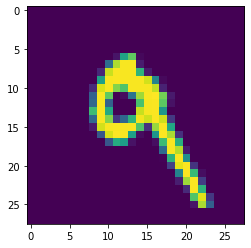

In [47]:
plt.imshow(xtest[7])

In [48]:
np.argmax(net.predict(x_test)[7])

9

In [49]:
y_test[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [50]:
net.evaluate(x_test,y_test)

313/313 [==============================] - 0s 919us/step - loss: 0.2687 - accuracy: 0.9267


[0.26873183250427246, 0.9266999959945679]

MNIST
2. Support Vector Machine

In [56]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(list(mnist))
x, y = mnist['data'], mnist['target']

['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url']


In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

In [61]:
import numpy as np
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(x_train)
accuracy_score(y_train, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8953469387755102

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32))
x_test_scaled = scaler.fit_transform(x_test.astype(np.float32))

In [63]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(x_train_scaled, y_train)

y_pred = lin_clf.predict(x_train_scaled)

accuracy_score(y_train, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9251632653061225

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(x_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=10.62998845878543, gamma=0.006809094315431854 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=10.62998845878543, gamma=0.006809094315431854, total=   1.3s
[CV] C=10.62998845878543, gamma=0.006809094315431854 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .. C=10.62998845878543, gamma=0.006809094315431854, total=   1.3s
[CV] C=10.62998845878543, gamma=0.006809094315431854 .................
[CV] .. C=10.62998845878543, gamma=0.006809094315431854, total=   1.3s
[CV] C=10.593722084321056, gamma=0.0018635792610604833 ...............
[CV]  C=10.593722084321056, gamma=0.0018635792610604833, total=   1.0s
[CV] C=10.593722084321056, gamma=0.0018635792610604833 ...............
[CV]  C=10.593722084321056, gamma=0.0018635792610604833, total=   1.1s
[CV] C=10.593722084321056, gamma=0.0018635792610604833 ...............
[CV]  C=10.593722084321056, gamma=0.0018635792610604833, total=   1.1s
[CV] C=8.429503146169155, gamma=0.018326620101419906 .................
[CV] .. C=8.429503146169155, gamma=0.018326620101419906, total=   1.3s
[CV] C=8.429503146169155, gamma=0.018326620101419906 .................
[CV] .. C=8.429503146169155, gamma=0.018326620101419906, total=   1.3s
[CV] C=8.429503146169155, gamma=0.018326620101419906 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   36.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff1e54c2b00>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff1e54c27f0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [65]:
rnd_search_cv.best_estimator_

SVC(C=10.593722084321056, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0018635792610604833, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [66]:
rnd_search_cv.best_score_

0.893003782225339

In [67]:
rnd_search_cv.best_estimator_.fit(x_train_scaled, y_train)

y_pred = rnd_search_cv.best_estimator_.predict(x_train_scaled)
print(accuracy_score(y_train, y_pred))

y_pred = rnd_search_cv.best_estimator_.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred))

0.9997959183673469
0.9683809523809523


MNIST
3. Random forest

In [68]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

x, y = mnist['data'], mnist['target']
print("x shape = ", x.shape)
print("y shape = ", y.shape)

x shape =  (70000, 784)
y shape =  (70000,)


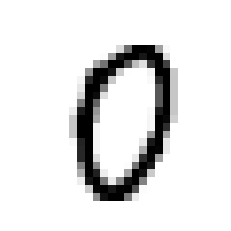

Answer =  0


In [69]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
sample = x[1000]
sample = sample.reshape(28, 28)

plt.imshow(sample, cmap=matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()
print("Answer = ", y[1000])

In [70]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.96245, 0.96735, 0.96645])

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
clf.fit(x_train_scale, y_train)

cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.96365, 0.96695, 0.96675])

In [76]:
x_test_scale = scaler.fit_transform(x_test)
prediction = clf.predict(x_test_scale)
result = (prediction == y_test).mean()
print(result)

0.9572


1. Softmax Regression - 93%
2. Support Vector Machine - 89%
3. Random forest - 96%

스케일링 같은 어떠한 전처리 없이 실행한 정확도는 첫번째 소수점 반올림한 기준으로 3번 랜덤포레스트가 가장 높았습니다. 반면 가장 정확도가 낮았던 결과는 2번 SVM 이었습니다.